In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data = pd.read_csv('./company_stock_prices/AMZN.csv', 
                    header=0, 
                    usecols=['Date', 'Close'], 
                    parse_dates=True, 
                    index_col= 'Date')

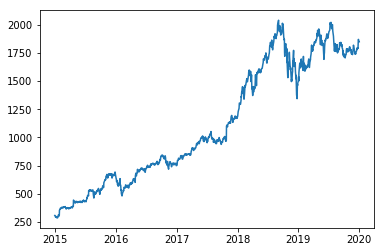

In [3]:
plt.plot(data['Close'])
plt.show()

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [5]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

In [6]:
# 70-30 split
train_length = int(len(scaled_data) * 0.7)
test_length = len(scaled_data) - train_length
train_data = scaled_data[0:train_length,:]
test_data = scaled_data[train_length:len(scaled_data),:]

In [7]:
def create_dataset(dataset, timestep = 1):
    data_x, data_y = [], []
    for i in range(len(dataset) - timestep - 1):
        data_x.append(dataset[i: (i+timestep), 0])
        data_y.append(dataset[i + timestep, 0])
    return np.array(data_x), np.array(data_y)

In [8]:
timestep = 1
train_x, train_y = create_dataset(train_data, timestep)
test_x, test_y = create_dataset(test_data, timestep)

In [9]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))

In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dense

In [11]:
model = Sequential()

# Adding the first LSTM layer
model.add(LSTM(units = 50, return_sequences = True, input_shape = (train_x.shape[1], 1)))

# Adding a second LSTM layer
model.add(LSTM(units = 50, return_sequences = True))
    
# Adding a third LSTM layer
model.add(LSTM(units = 50, return_sequences = True))

# Adding a fourth LSTM layer
model.add(LSTM(units = 50))

# Adding the output layer
model.add(Dense(units = 1))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 50)             20200     
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 71,051
Trainable params: 71,051
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

In [14]:
model.fit(train_x, train_y, epochs=100, batch_size=64, verbose=1)
score = model.evaluate(train_x, train_y, verbose=0)
print('Keras model loss = ', score[0])
print('Keras model accuracy = ', score[1])

Epoch 1/100
14/14 [==============================] - 0s 5ms/step - loss: 0.1202 - accuracy: 0.0011
Epoch 2/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0822 - accuracy: 0.0011
Epoch 3/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0418 - accuracy: 0.0011
Epoch 4/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 0.0011
Epoch 5/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0268 - accuracy: 0.0011
Epoch 6/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0186 - accuracy: 0.0011
Epoch 7/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0081 - accuracy: 0.0011
Epoch 8/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 0.0011
Epoch 9/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0014 - accuracy: 0.0011
Epoch 10/100
14/14 [==============================] - 0s 5ms/step - loss: 0.0011 - accuracy: 0.0011
Epoch 11/

In [15]:
train_predictions = model.predict(train_x)
test_predictions = model.predict(test_x)

In [16]:
train_predictions = scaler.inverse_transform(train_predictions)
train_y = scaler.inverse_transform([train_y])

test_predictions = scaler.inverse_transform(test_predictions)
test_y = scaler.inverse_transform([test_y])

In [17]:
train_predict_plot = np.empty_like(scaled_data)
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(train_predictions)+1, :] = train_predictions

In [18]:
test_predict_plot = np.empty_like(scaled_data)
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_predictions)+2+1 : len(scaled_data)-1, :] = test_predictions

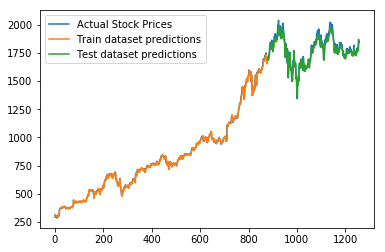

In [19]:
actual_stock_prices, = plt.plot(scaler.inverse_transform(scaled_data), label='Actual Stock Prices')
train_dataset_prediction, = plt.plot(train_predict_plot, label='Train dataset predictions')
test_dataset_prediction, = plt.plot(test_predict_plot, label='Test dataset predictions')
plt.legend(handles = [actual_stock_prices, train_dataset_prediction, test_dataset_prediction])
plt.show()

In [51]:
# data1 = pd.read_csv('./company_stock_prices/AMZN.csv')
# test_data_list = data1['Close'].tolist()
# test_data_sliced = test_data_list[int(len(test_data_list)*0.7)+1:int(len(test_data_list))-1]
# data1 = data['Close'].tolist()
data1 = scaler.inverse_transform(scaled_data).flatten()
test_data_sliced = data1[train_length:len(data1)]
test_data_array = np.array(test_data_sliced)


test_prediction_flattened = test_predictions.flatten()

df = pd.DataFrame({'Actual Values':test_data_array, 'Predicted Values':test_prediction_flattened})


error = mean_squared_error(test_data_array, test_prediction_flattened)
print('Testing Mean Squared Error: %.3f' % error)

ValueError: arrays must all be same length

In [46]:
df

,Actual Values,Predicted Values
0,1699.729980,1702.326416
1,1710.630005,1684.203857
2,1739.020020,1689.490356
3,1743.069946,1699.453125
4,1755.000000,1725.254150
5,1796.619995,1728.917114
6,1813.030029,1739.681396
7,1822.489990,1776.927368
8,1843.930054,1791.479370
9,1842.920044,1799.833496


In [50]:
print('Whole Dataset length: ',len(data))
print('Train dataset length: ',train_length)
print('Test dataset length: ',test_length)
print('Predicted Values dataset length: ',len(test_prediction_flattened))
print('First predicted value: ', test_prediction_flattened[0])
print('First test value: ', test_data_array[2])

Whole Dataset length:  1258
Train dataset length:  880
Test dataset length:  378
Predicted Values dataset length:  376
First predicted value:  1702.3264
First test value:  1699.72998


In [48]:
print(scaler.inverse_transform(scaled_data).flatten())

[ 308.519989  302.190002  295.290009 ... 1869.800049 1846.890015
 1847.839966]


In [62]:
# test_predict_df = np.empty_like(scaled_data)
# test_predict_df[:,:] = np.nan
# test_predict_df[len(train_predictions)+2+1 : len(scaled_data)-1, :] = test_predictions
# actual_test_df = scaler.inverse_transform(scaled_data)

# dataframe = pd.DataFrame({'Actual Values':actual_test_df.flatten(), 'Predicted Values':test_predict_df.flatten()})

# dataframe

# print(len(test_predict_df.flatten()))
# print(len(actual_test_df.flatten()))

In [66]:
print(len(test_prediction_flattened))

376


In [70]:
actual_complete_data = scaler.inverse_transform(scaled_data).flatten()
actual_complete_sliced = np.empty_like(actual_complete_data)
actual_complete_sliced[:,:] = np.nan
actual_complete_sliced[len(train_predictions)+2+1 : len(scaled_data)-1] = actual_complete_data

IndexError: too many indices for array